In [ ]:
!nvidia-smi

Sun Apr 25 06:21:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mouting Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [1]:
!pip install nltk==3.5
from nltk.translate.meteor_score import meteor_score
from nltk.translate.bleu_score import sentence_bleu
import random

     |████████████████████████████████| 1.4MB 25.2MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434674 sha256=fd87320d0df69ddefe5e7b8ec1b9b1690a0f3ad6494bb14abe7cb0942df8d711
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
from sklearn.model_selection import train_test_split
import datetime
import time
from PIL import Image
import collections
import random
from keras.models import load_model

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.models import Model
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


# Preprocessing

In [ ]:
def creating_Data(path):
  images = []
  image_names = []
  count = 0 
  for root, dirs, files in os.walk(path):
    for file in files:
      count += 1
      image_names.append(file)
      img = plt.imread(os.path.join(root, file))
      img = cv2.resize(img, dsize=(224, 224))
      images.append(img)
      if count%500 == 0:
        print(count)
  return images, image_names

In [ ]:
images, image_names = creating_Data('/content/drive/MyDrive/DL/Assignment_4/Data/Train/Images')
print(len(image_names))

6000

In [ ]:
# joblib.dump(images, '/content/drive/MyDrive/DL/Assignment_4/TrainImages')
# joblib.dump(image_names, '/content/drive/MyDrive/DL/Assignment_4/TrainImagesNames')

['/content/drive/MyDrive/DL/Assignment_4/TrainImagesNames']

In [ ]:
images = joblib.load('/content/drive/MyDrive/DL/Assignment_4/TrainImages')
image_names = joblib.load('/content/drive/MyDrive/DL/Assignment_4/TrainImagesNames')

In [ ]:
images_val, image_names_val = creating_Data('/content/drive/MyDrive/DL/Assignment_4/Data/Val/Images')
print(len(image_names_val))

In [ ]:
# joblib.dump(images_val, '/content/drive/MyDrive/DL/Assignment_4/ValImages')
# joblib.dump(image_names_val, '/content/drive/MyDrive/DL/Assignment_4/ValImagesNames')

['/content/drive/MyDrive/DL/Assignment_4/ValImagesNames']

In [ ]:
images_val = joblib.load('/content/drive/MyDrive/DL/Assignment_4/ValImages')
image_names_val = joblib.load('/content/drive/MyDrive/DL/Assignment_4/ValImagesNames')

In [ ]:
images_test, image_names_test = creating_Data('/content/drive/MyDrive/DL/Assignment_4/Data/Test/Images')
print(len(image_names_test))

500
1000
1000


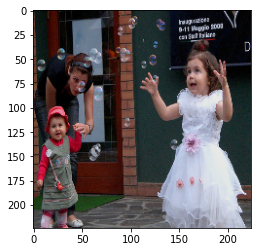

In [ ]:
plt.imshow(images_test[0])

In [ ]:
# joblib.dump(images_test, '/content/drive/MyDrive/DL/Assignment_4/TestImages')
# joblib.dump(image_names_test, '/content/drive/MyDrive/DL/Assignment_4/TestImagesNames')

['/content/drive/MyDrive/DL/Assignment_4/TestImagesNames']

In [ ]:
images_test = joblib.load('/content/drive/MyDrive/DL/Assignment_4/TestImages')
image_names_test = joblib.load('/content/drive/MyDrive/DL/Assignment_4/TestImagesNames')

In [ ]:
images_all = images + images_val + images_test
print(len(images_all))

8000


In [ ]:
image_names_all = image_names + image_names_val + image_names_test

In [ ]:
image_dataset_all = {}
for i in range(len(image_names_all)):
  image_dataset_all[image_names_all[i]] = images_all[i]

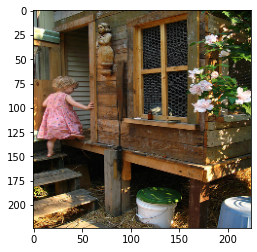

In [ ]:
plt.imshow(image_dataset_all['1000268201_693b08cb0e.jpg'])

In [ ]:
def Clean_Tagging(data):
  for j in sorted(data.keys()):
    for i in range(len(data[j])):
      data[j][i] = '<start> ' + data[j][i].lower() + ' <end>'

In [ ]:
def convert_to_DataFrame(data):
  img_caption = []
  for i in sorted(data.keys()):
    for caption in data[i]:
      img_caption.append((i, caption))
  df = pd.DataFrame(img_caption, columns=['ImageName', 'Caption'])
  return df

In [ ]:
data = pd.read_pickle('/content/drive/MyDrive/DL/Assignment_4/Data/Train/train_captions.pkl')
data_val = pd.read_pickle('/content/drive/MyDrive/DL/Assignment_4/Data/Val/val_captions.pkl')
data_test = pd.read_pickle('/content/drive/MyDrive/DL/Assignment_4/Data/Test/test_captions.pkl')

In [ ]:
Clean_Tagging(data)
Clean_Tagging(data_val)
Clean_Tagging(data_test)

In [ ]:
data.update(data_val)

In [ ]:
data.update(data_test)

In [ ]:
len(data)

8000

In [ ]:
data['103106960_e8a41d64f8.jpg']

['<start> a boy with a stick kneeling in front of a goalie net <end>',
 '<start> a child in a red jacket playing street hockey guarding a goal . <end>',
 '<start> a young kid playing the goalie in a hockey rink . <end>',
 '<start> a young male kneeling in front of a hockey goal with a hockey stick in his right hand . <end>',
 '<start> "hockey goalie boy in red jacket crouches by goal , with stick ." <end>']

In [ ]:
df = convert_to_DataFrame(data)
# df_val = convert_to_DataFrame(data_val)
# df_test = convert_to_DataFrame(data_test)

In [ ]:
df_train_val = df_train.append(df_val)

In [ ]:
df_all = df_train_val.append(df_test)

In [ ]:
df_all.tail(20)

ImageName                                            Caption
4980   96420612_feb18fc6c6.jpg  <start> a man in red swim trunks is jumping on...
4981   96420612_feb18fc6c6.jpg  <start> a man in red trunks flies through the ...
4982   96420612_feb18fc6c6.jpg  <start> a man with a wake-board is diving over...
4983   96420612_feb18fc6c6.jpg          <start> a shirtless man bodysurfs . <end>
4984   96420612_feb18fc6c6.jpg   <start> man is diving onto his wakeboard . <end>
4985  968081289_cdba83ce2e.jpg  <start> a boy jumping off of a dock while his ...
4986  968081289_cdba83ce2e.jpg  <start> two boys are climbing a wooden platfor...
4987  968081289_cdba83ce2e.jpg  <start> two boys jumping off the pier into the...
4988  968081289_cdba83ce2e.jpg  <start> two boys preparing to jump off a pier ...
4989  968081289_cdba83ce2e.jpg  <start> two children jump off the dock into th...
4990  979383193_0a542a059d.jpg  <start> a group of six children sit at a woode...
4991  979383193_0a542a059d.jpg  <start> a group of young asian children pose f...
4992  979383193_0a542a059d.jpg  <start> "six children , all with black hair , ...
4993  979383193_0a542a059d.jpg            <start> six children at a table . <end>
4994  979383193_0a542a059d.jpg  <start> six small children sitting at a desk ....
4995  997722733_0cb5439472.jpg  <start> a man in a pink shirt climbs a rock fa...
4996  997722733_0cb5439472.jpg  <start> a man is rock climbing high in the air...
4997  997722733_0cb5439472.jpg  <start> a person in a red shirt climbing up a ...
4998  997722733_0cb5439472.jpg      <start> a rock climber in a red shirt . <end>
4999  997722733_0cb5439472.jpg  <start> a rock climber practices on a rock cli...

In [ ]:
corpus = np.array(df['Caption'])
print(len(corpus))

40000


In [ ]:
corpus[0]

'<start> a child in a pink dress is climbing up a set of stairs in an entry way . <end>'

In [ ]:
corpus_val = np.array(df_val['Caption'])

In [ ]:
print(len(corpus))

30000


In [ ]:
t=Tokenizer()
t.fit_on_texts(corpus)
text_matrix = t.texts_to_sequences(corpus)

In [ ]:
t.word_index['start']

3

In [ ]:
text_matrix[:5]

[[3, 1, 43, 4, 1, 88, 172, 7, 117, 53, 1, 390, 12, 397, 4, 28, 4448, 628, 2],
 [3, 1, 19, 316, 65, 1, 197, 120, 2],
 [3, 1, 40, 19, 117, 65, 1, 197, 2073, 2],
 [3, 1, 40, 19, 117, 5, 397, 20, 61, 2073, 2],
 [3, 1, 40, 19, 4, 1, 88, 172, 316, 65, 1, 197, 2914, 2]]

In [ ]:
max_len = 0
for i in text_matrix:
  if max_len < len(i):
    max_len = len(i)
print(max_len)

39


In [ ]:
text_pad = pad_sequences(text_matrix, maxlen=max_len+1, padding='post')
# text_pad_val = pad_sequences(text_matrix_val, maxlen=max_len+1, padding='post')
print(len(text_pad))
# print(text_pad[:5])

40000


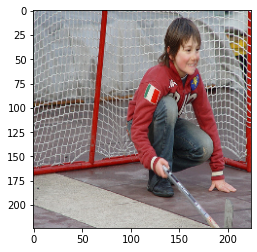

In [ ]:
plt.imshow(image_dataset_all['103106960_e8a41d64f8.jpg'])

In [ ]:
data_embeddings['997722733_0cb5439472.jpg']

[array([  3,   1,  11,   4,   1,  90,  36, 252,   1,  84, 122,   2,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0], dtype=int32),
 array([  3,   1,  11,   7,  84, 119, 191,   4,   5,  65,   2,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0], dtype=int32),
 array([   3,    1,   44,    4,    1,   25,   36,  119,   51,    1,   84,
         122,  164,    4, 3521, 1722,    2,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0], dtype=int32),
 array([  3,   1,  84, 357,   4,   1,  25,  36,   2,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,


In [ ]:
text_pad[-5:]

array([[   3,    1,   11,    4,    1,   90,   36,  252,    1,   84,  122,
           2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   3,    1,   11,    7,   84,  119,  191,    4,    5,   65,    2,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   3,    1,   44,    4,    1,   25,   36,  119,   51,    1,   84,
         122,  164,    4, 3521, 1722,    2,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   3,    1,   84,  357,    4,    1,   25,   36,    2,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  

In [ ]:
data_embeddings = {}
count = 0
for img_nm in df['ImageName']:
  try:
    data_embeddings[img_nm].append(text_pad[count])
    count += 1
  except:
     data_embeddings[img_nm] = [text_pad[count]]
     count += 1

In [ ]:
len(data_embeddings), len(image_dataset_all)

(8000, 8000)

In [ ]:
img_name_vec = np.array(df['ImageName'])
print(len(img_name_vec))

40000


In [ ]:
image_try = {}
count = 0
for i in df['ImageName']:
  image_try = image_dataset_all[i]

1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1000268201_693b08cb0e.jpg
1001773457_577c3a7d70.jpg
1001773457_577c3a7d70.jpg
1001773457_577c3a7d70.jpg
1001773457_577c3a7d70.jpg
1001773457_577c3a7d70.jpg


In [ ]:
img_name_train, img_name_test, text_pad_train, text_pad_test = train_test_split(img_name_vec, text_pad, test_size=0.2, random_state=42)

In [ ]:
img_name_train = np.array(df_train['ImageName'])
img_name_test = np.array(df_val['ImageName'])

In [ ]:
print(img_name_train.shape, img_name_test.shape, text_pad_train.shape, text_pad_test.shape)

(32000,) (8000,) (32000, 40) (8000, 40)


In [ ]:
len(t.word_index)

7375

In [ ]:
# joblib.dump(image_dataset, '/content/drive/MyDrive/DL/Assignment_4/Dict_Images')
# joblib.dump(data_embeddings, '/content/drive/MyDrive/DL/Assignment_4/Dict_Embeddings')
# joblib.dump(captions, '/content/drive/MyDrive/DL/Assignment_4/Dict_Captions')

['/content/drive/MyDrive/DL/Assignment_4/Dict_Captions']

# Data Loading

In [6]:
captions = joblib.load('/content/drive/MyDrive/DL/Assignment_4/Dict_Captions')

In [7]:
captions['/content/drive/MyDrive/DL/Assignment_4/Data/Test/Images/1056338697_4f7d7ce270.jpg']

['<start> a blond woman in a blue shirt appears to wait for a ride . <end>',
 '<start> a blond woman is on the street hailing a taxi . <end>',
 '<start> "a woman is signaling is to traffic , as seen from behind ." <end>',
 '<start> a woman with blonde hair wearing a blue tube top is waving on the side of the street . <end>',
 '<start> the woman in the blue dress is holding out her arm at oncoming traffic . <end>']

In [ ]:
image_names = list(captions.keys())

In [ ]:
train_captions = []
img_name_vector = []

for image_path in image_names[:6000]:
  caption_list = captions[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))

In [ ]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.keras.applications.vgg16.preprocess_input(img)
    return img, image_path

In [ ]:
image_model = tf.keras.applications.VGG16(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)
image_features_extract_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [ ]:
encode_train = sorted(set(img_name_vector))

image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(32)

for img, path in image_dataset:
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

In [ ]:
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [ ]:
top_k = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k, oov_token="<unk>", filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(train_captions)

In [ ]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [ ]:
train_seqs = tokenizer.texts_to_sequences(train_captions)

In [ ]:
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [ ]:
max_length = calc_max_length(train_seqs)

In [ ]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
  img_to_cap_vector[img].append(cap)


img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

In [ ]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(24000, 24000, 6000, 6000)

In [ ]:
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Soft Attention Architecture Classes

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE
features_shape = 2048
attention_features_shape = 49

In [ ]:
class BahdanauAttention(tf.keras.Model): #Soft Attention
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    score = self.V(attention_hidden_layer)

    attention_weights = tf.nn.softmax(score, axis=1)

    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
class CNN_Encoder(tf.keras.Model):

    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [ ]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):

    context_vector, attention_weights = self.attention(features, hidden)

    x = self.embedding(x)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    output, state = self.gru(x)
    x = self.fc1(output)
    x = tf.reshape(x, (-1, x.shape[2]))
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [ ]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)


optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)
  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  return tf.reduce_mean(loss_)

In [ ]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [ ]:
# listDataset = list(dataset)

In [ ]:
# joblib.dump(listDataset,'/content/drive/MyDrive/DL/Assignment_4/dataset')

In [ ]:
# dataset = joblib.load('/content/drive/MyDrive/DL/Assignment_4/dataset')

In [ ]:
# len(list(dataset))

In [ ]:
def train_data(dataset, EPOCHS=10):
  loss_plot = []
  
  for epoch in range(EPOCHS):
      start_time = time.time()
      total_loss = 0
      
      for (batch, (img_tensor, target)) in enumerate(dataset):
          
          batch_loss, t_loss = train_step(img_tensor, target)
          total_loss += t_loss
          
          if batch % 100 == 0:
              average_batch_loss = batch_loss.numpy()/int(target.shape[1])
              # print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
              
      loss_plot.append(total_loss / num_steps)
      end_time = time.time()
      print('Epoch {0:d}/{1:d}'.format(epoch+1, EPOCHS), ": {0:.3f}sec".format((end_time - start_time)))
      print('===============>  train-loss=%.3f' % (total_loss/num_steps))
      
  return loss_plot

In [ ]:
def plotting_loss(loss_plot):
  plt.plot(loss_plot)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss Plot')
  plt.show()

# Training Model

In [ ]:
loss_plot = train_data(dataset, 10)

Epoch 1/10 : 81.028sec
===============>  train-loss=1.347
Epoch 2/10 : 47.239sec
===============>  train-loss=1.030
Epoch 3/10 : 47.472sec
===============>  train-loss=0.921
Epoch 4/10 : 47.750sec
===============>  train-loss=0.843
Epoch 5/10 : 47.813sec
===============>  train-loss=0.782
Epoch 6/10 : 47.681sec
===============>  train-loss=0.730
Epoch 7/10 : 47.424sec
===============>  train-loss=0.685
Epoch 8/10 : 47.388sec
===============>  train-loss=0.646
Epoch 9/10 : 47.351sec
===============>  train-loss=0.611
Epoch 10/10 : 47.127sec
===============>  train-loss=0.579


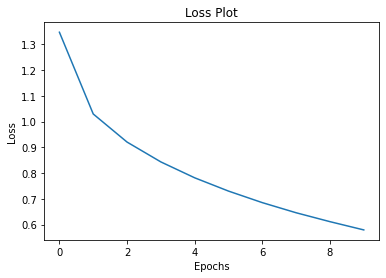

In [ ]:
plotting_loss(loss_plot)

In [ ]:
def convert_To_numPy(loss_plot):
  for i in range(len(loss_plot)):
    loss_plot[i] = loss_plot[i].numpy()
  return loss_plot

In [ ]:
loss_plot__1 = convert_To_numPy(loss_plot)

In [ ]:
loss_plot1 = train_data(dataset, 40)

Epoch 1/40 : 47.114sec
===============>  train-loss=0.555
Epoch 2/40 : 47.457sec
===============>  train-loss=0.531
Epoch 3/40 : 47.188sec
===============>  train-loss=0.507
Epoch 4/40 : 47.384sec
===============>  train-loss=0.485
Epoch 5/40 : 47.344sec
===============>  train-loss=0.464
Epoch 6/40 : 47.479sec
===============>  train-loss=0.446
Epoch 7/40 : 47.354sec
===============>  train-loss=0.428
Epoch 8/40 : 47.448sec
===============>  train-loss=0.414
Epoch 9/40 : 46.694sec
===============>  train-loss=0.398
Epoch 10/40 : 47.253sec
===============>  train-loss=0.384
Epoch 11/40 : 47.129sec
===============>  train-loss=0.372
Epoch 12/40 : 47.302sec
===============>  train-loss=0.361
Epoch 13/40 : 47.369sec
===============>  train-loss=0.350
Epoch 14/40 : 46.991sec
===============>  train-loss=0.339
Epoch 15/40 : 47.094sec
===============>  train-loss=0.330
Epoch 16/40 : 47.110sec
===============>  train-loss=0.322
Epoch 17/40 : 47.398sec
===============>  train-loss=0.313
Epoch 

In [ ]:
loss_plot__2 = convert_To_numPy(loss_plot1)

In [ ]:
loss_plot_3 = loss_plot__1 + loss_plot__2

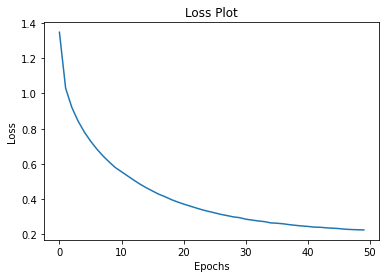

In [ ]:
plotting_loss(loss_plot_3)

Epoch 1/50 : 40.389sec
===============>  train-loss=0.243
Epoch 2/50 : 39.720sec
===============>  train-loss=0.240
Epoch 3/50 : 40.198sec
===============>  train-loss=0.238
Epoch 4/50 : 40.109sec
===============>  train-loss=0.262
Epoch 5/50 : 40.148sec
===============>  train-loss=0.233
Epoch 6/50 : 40.137sec
===============>  train-loss=0.218
Epoch 7/50 : 40.019sec
===============>  train-loss=0.212
Epoch 8/50 : 40.115sec
===============>  train-loss=0.208
Epoch 9/50 : 40.171sec
===============>  train-loss=0.209
Epoch 10/50 : 40.039sec
===============>  train-loss=0.209
Epoch 11/50 : 40.121sec
===============>  train-loss=0.204
Epoch 12/50 : 39.964sec
===============>  train-loss=0.207
Epoch 13/50 : 40.029sec
===============>  train-loss=0.208
Epoch 14/50 : 40.187sec
===============>  train-loss=0.209
Epoch 15/50 : 40.027sec
===============>  train-loss=0.204
Epoch 16/50 : 40.054sec
===============>  train-loss=0.199
Epoch 17/50 : 39.508sec
===============>  train-loss=0.200
Epoch 

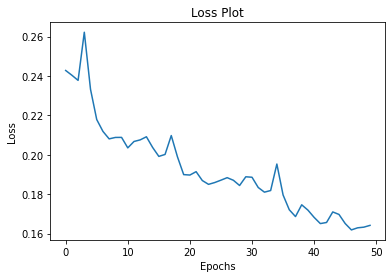

In [ ]:
loss_plot = train_data(dataset, 50)
plotting_loss(loss_plot)

Prediction Caption: the lady dances as the little girl carries the camera <end>


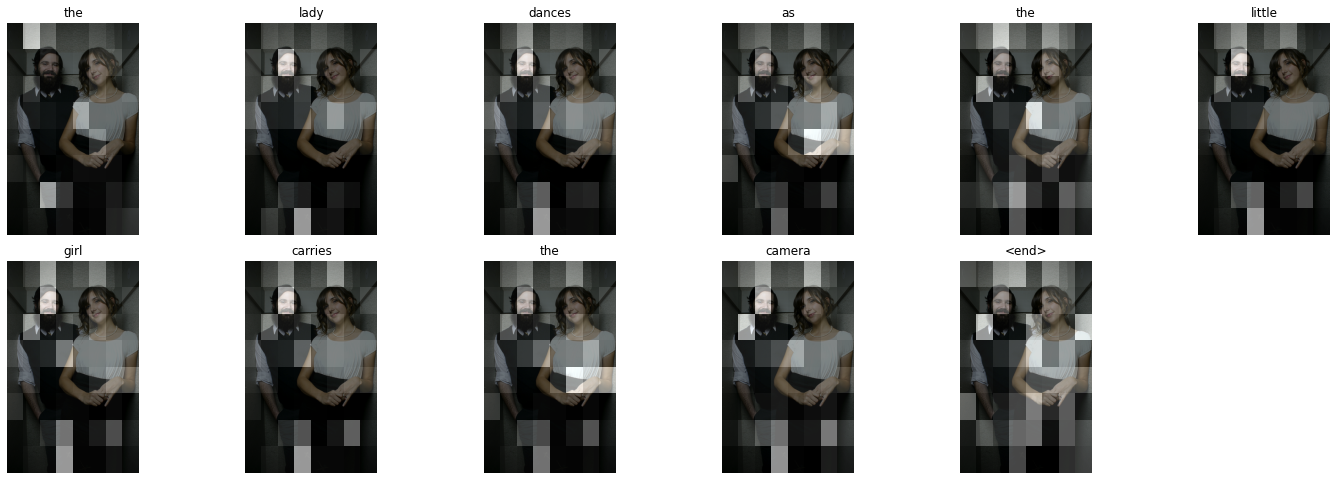

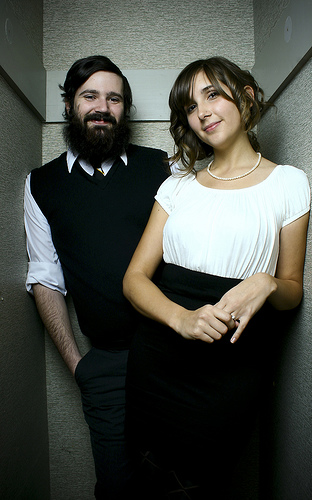

In [ ]:
image_path = image_names[6100]
result, attention_plot = evaluate(image_path, encoder, decoder)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
Image.open(image_path)

## Caption with Attention Weights, other helper functions

In [ ]:
def evaluate(image, encoder, decoder):
    attention_plot = np.zeros((max_length, attention_features_shape))
    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [ ]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))
    fig = plt.figure(figsize=(20, 20))
    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (8, 8))
        grid_size = max(np.ceil(len_result/2), 2)
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Real Caption: <start> lone red team player breaks through two black team players to hit the ball <end>
Prediction Caption: a group of young men are posing on the grass with other children and others nearby <end>


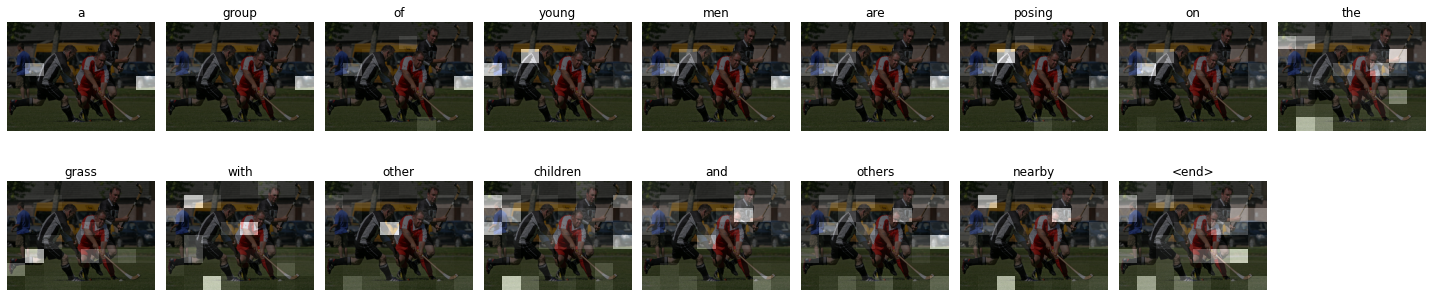

In [ ]:
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tokenizer.index_word[i]
                        for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image, encoder, decoder)
print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

## *I am not able to save decoder so you have to train models and then check the results*

In [ ]:
# encoder.save('/content/drive/MyDrive/DL/Assignment_4/Final_Encoder_Q1', save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DL/Assignment_4/Final_Encoder_Q1/assets


In [ ]:
# decoder.save_weights('/content/drive/MyDrive/DL/Assignment_4/Final_Decoder_Q1', save_format='tf')

In [ ]:
# encd1 = load_model('/content/drive/MyDrive/DL/Assignment_4/Final_Encoder_Q1')

In [ ]:
# embedding_dim = 256
# units = 512
# vocab_size = 5001
# optimizer = tf.keras.optimizers.Adam()
# loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
# dcd1 = RNN_Decoder(embedding_dim, units, vocab_size)
# dcd1.compile(loss=loss_object, optimizer=optimizer)

In [ ]:
# dcd1.load_weights('/content/drive/MyDrive/DL/Assignment_4/Final_Decoder_Q1')

## Try on images


Prediction Caption: a crowd of dogs running around in a park <end>


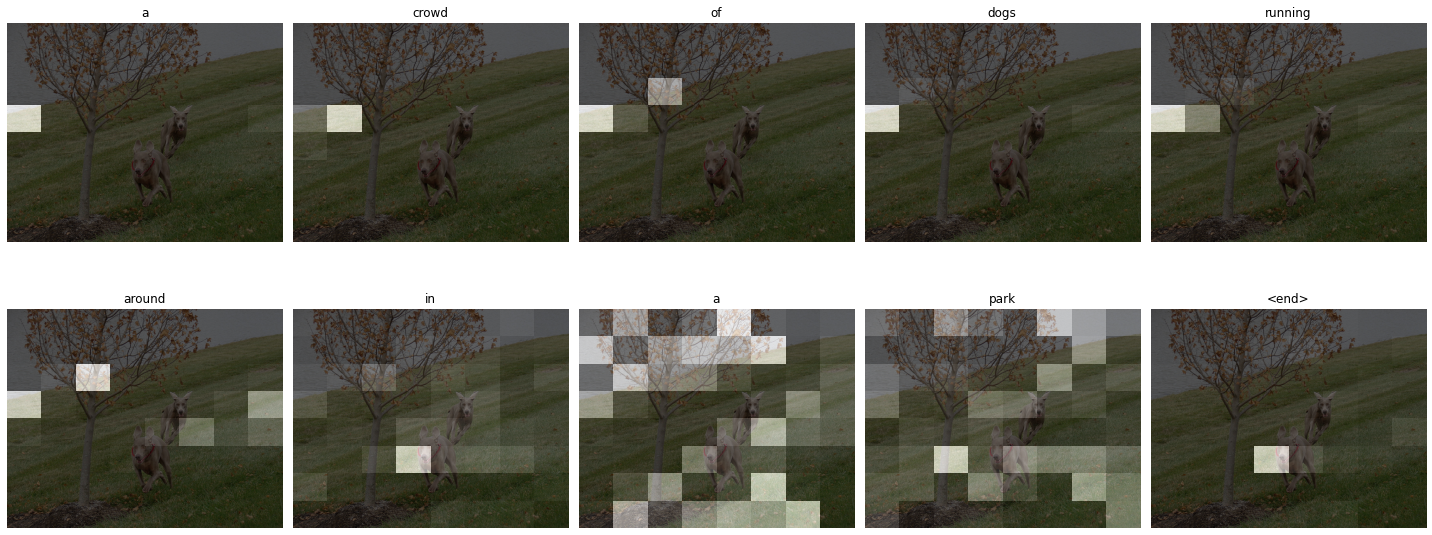

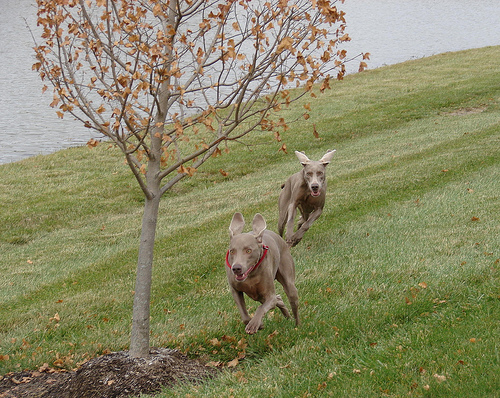

In [ ]:
image_path = image_names[6819]
result, attention_plot = evaluate(image_path, encoder, decoder)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
Image.open(image_path)

Prediction Caption: a small child walking on the grass <end>


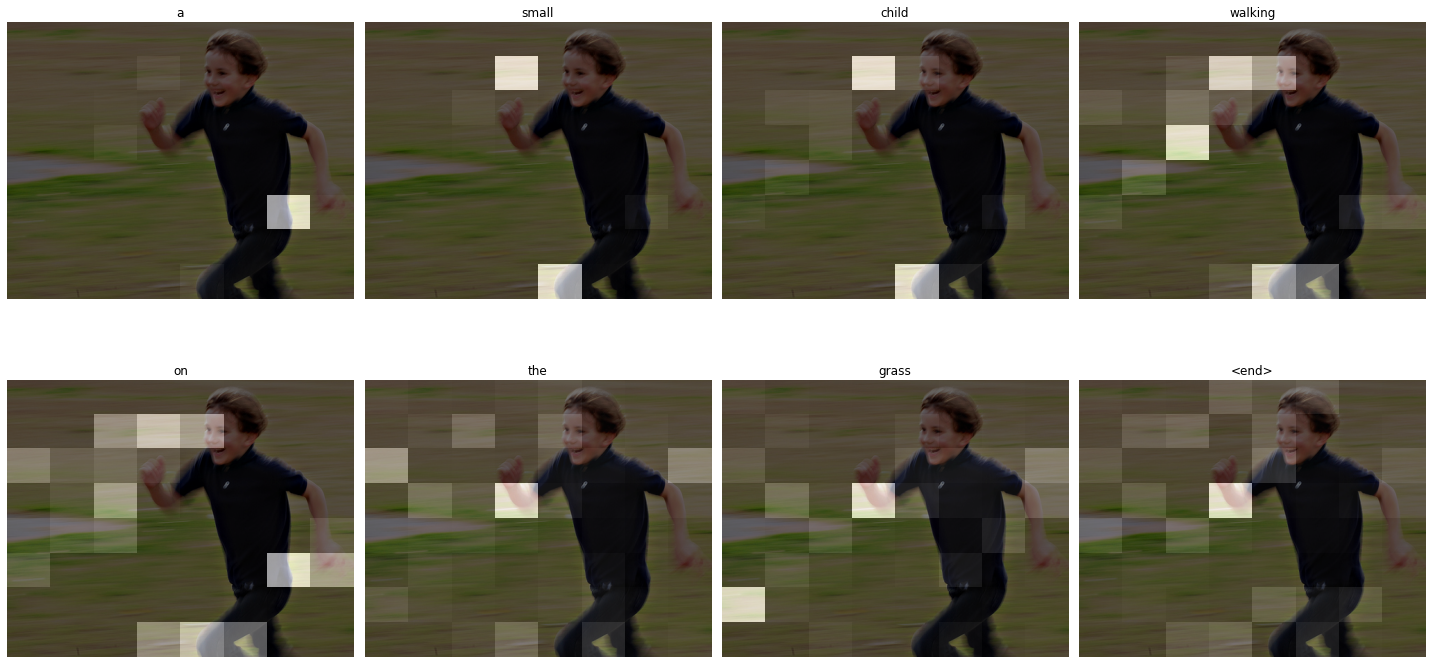

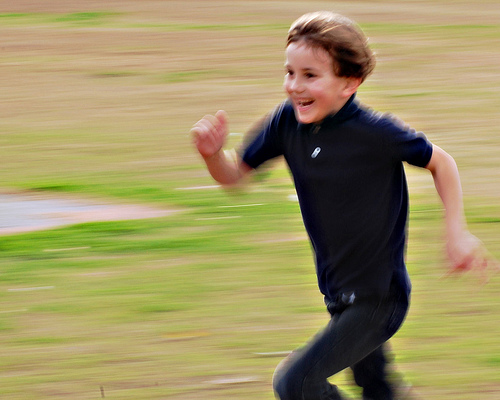

In [ ]:
image_path = image_names[6600]
result, attention_plot = evaluate(image_path, encoder, decoder)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
Image.open(image_path)

Prediction Caption: a brown dog is on a shallow water <end>


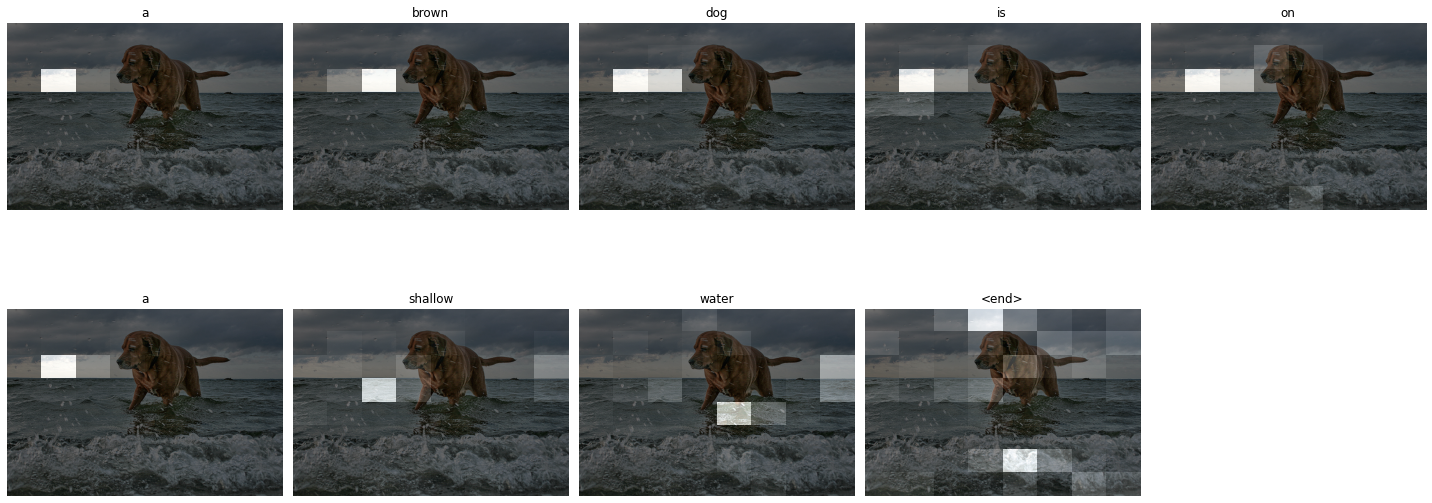

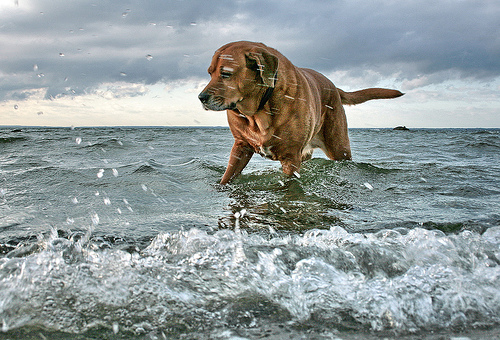

In [ ]:
image_path = image_names[6545]
result, attention_plot = evaluate(image_path, encoder, decoder)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
Image.open(image_path)

Prediction Caption: two people are walking towards a beach <end>


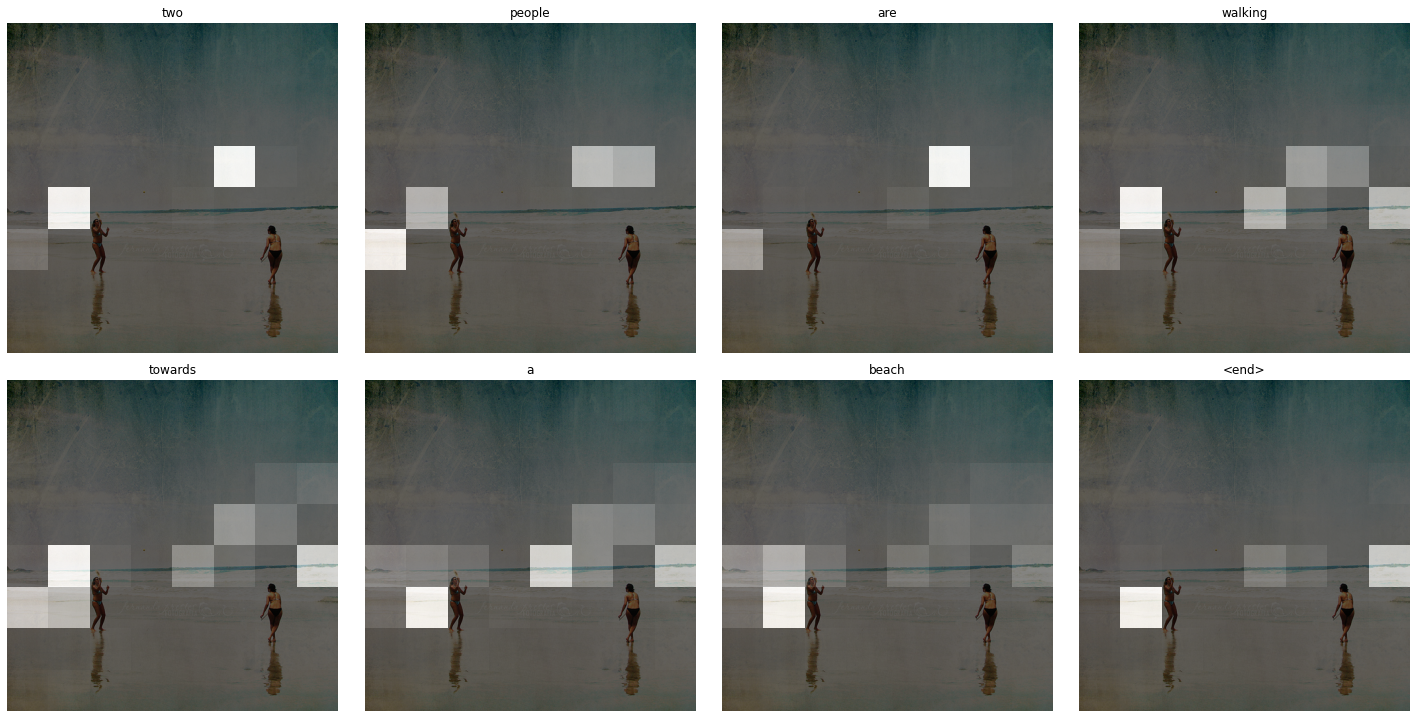

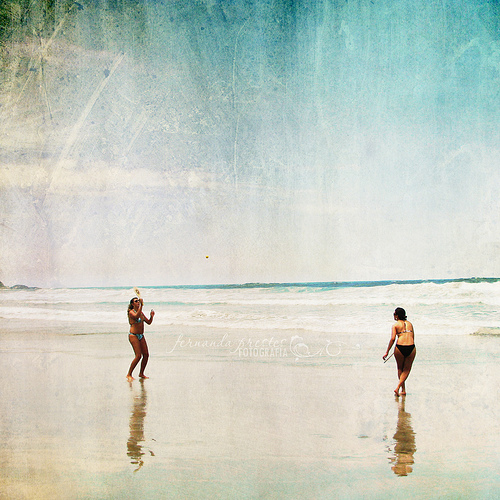

In [ ]:
image_path = image_names[7001]
result, attention_plot = evaluate(image_path, encoder, decoder)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
Image.open(image_path)

Prediction Caption: dog playing in the field <end>


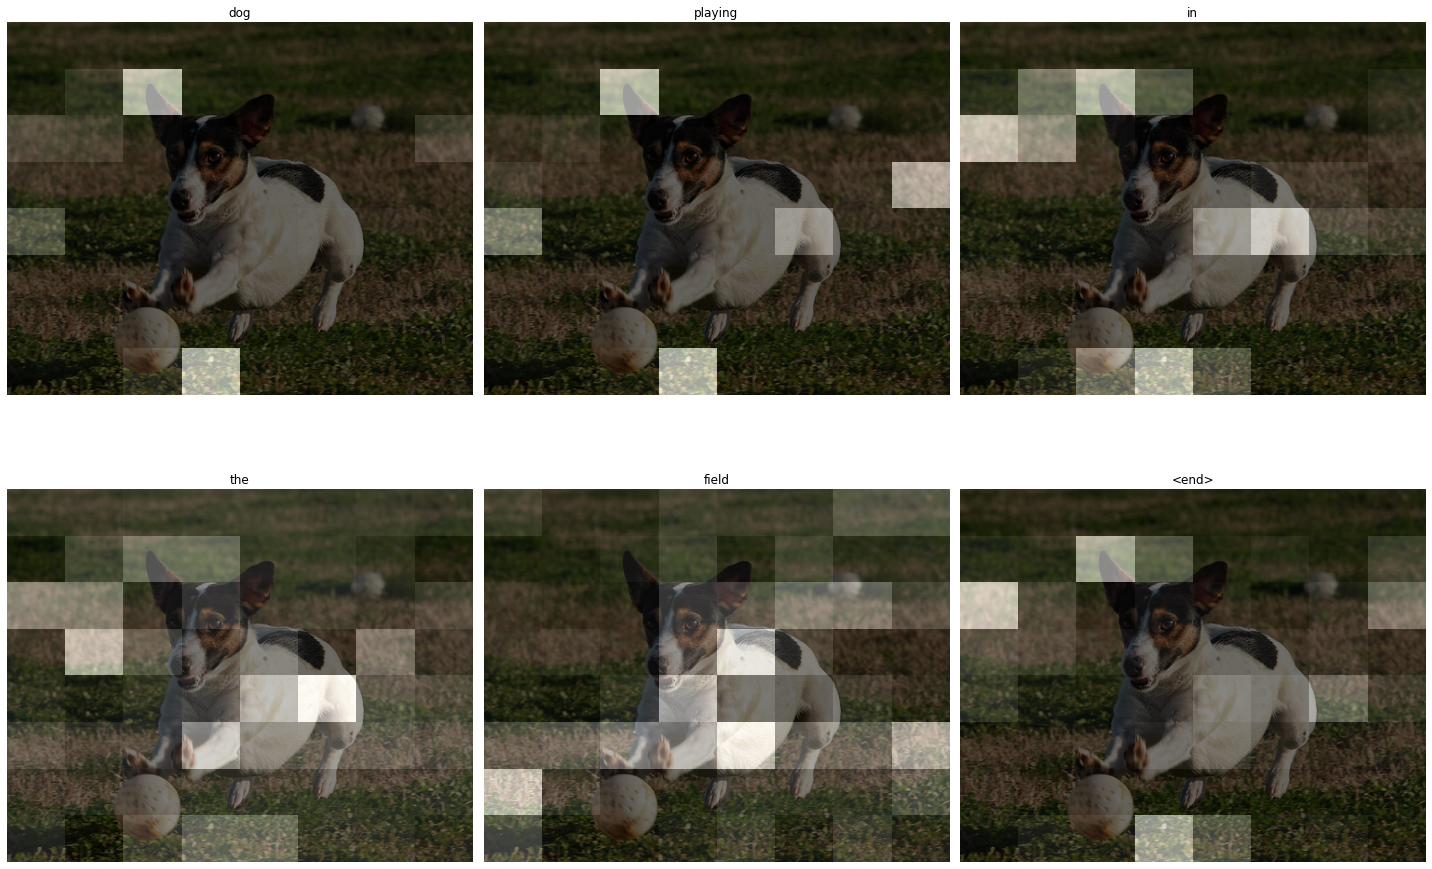

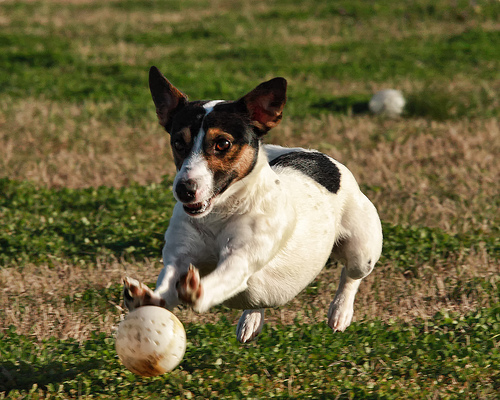

In [ ]:
image_path = image_names[7789]
result, attention_plot = evaluate(image_path, encoder, decoder)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
Image.open(image_path)

Prediction Caption: a tan dog is looking up in a grassy area <end>


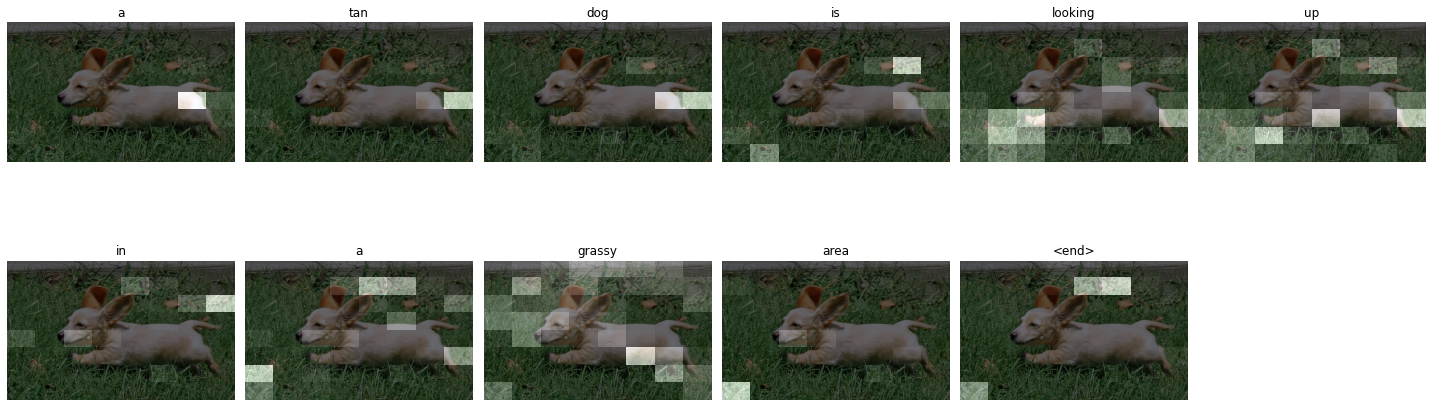

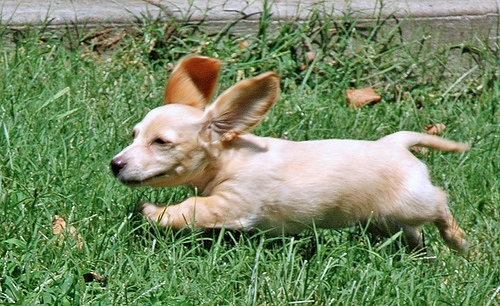

In [ ]:
image_path = '/content/drive/MyDrive/DL/Assignment_4/Data/Test/Images/1119015538_e8e796281e.jpg'
result, attention_plot = evaluate(image_path, encoder, decoder)
print('Prediction Caption:', ' '.join(result))
plot_attention(image_path, result, attention_plot)
Image.open(image_path)

# BLEU1-4 and METEOR

## BLEU 1-4

In [ ]:
def BLEU(image_names, captions, encoder, decoder, range1=6000 ,range2=7000, Bleu_wt = (1, 0, 0, 0)):
  scoreList = []
  for i in range(range1, range2):
    image_path = image_names[i]
    cap = captions[image_path]
    result, attention_plot = evaluate(image_path, encoder, decoder)
    result = result[:-1]
    max_score = -1
    for j in cap:
      score = sentence_bleu(j, result , weights=Bleu_wt)
      if score > max_score:
        max_score = score
    scoreList.append(max_score)
  return (sum(scoreList)*100)/len(scoreList)

## Individual BLEU Scores

In [ ]:
BLEU_1 = BLEU(image_names, captions, encoder, decoder)
print('BLEU-1 for the Validation Data is {0:.3f}'.format(BLEU_1))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1 for the Validation Data is 9.495


In [ ]:
BLEU_1 = BLEU(image_names, captions, encoder, decoder, range1=7000 ,range2=8000)
print('BLEU-1 for the Test Data is {0:.3f}'.format(BLEU_1))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1 for the Test Data is 8.910


In [ ]:
BLEU_2 = BLEU(image_names, captions, encoder, decoder, Bleu_wt = (0, 1, 0, 0))
print('BLEU-2 for the Validation Data is {0:.3f}'.format(BLEU_2))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-2 for the Validation Data is 87.500


In [ ]:
BLEU_2 = BLEU(image_names, captions, encoder, decoder, range1=7000 ,range2=8000, Bleu_wt = (0, 1, 0, 0))
print('BLEU-2 for the Test Data is {0:.3f}'.format(BLEU_2))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-2 for the Test Data is 87.600


In [ ]:
BLEU_3 = BLEU(image_names, captions, encoder, decoder, Bleu_wt = (0, 0, 1, 0))
print('BLEU-3 for the Validation Data is {0:.3f}'.format(BLEU_3))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-3 for the Validation Data is 87.600


In [ ]:
BLEU_3 = BLEU(image_names, captions, encoder, decoder, range1=7000 ,range2=8000, Bleu_wt = (0, 0, 1, 0))
print('BLEU-3 for the Test Data is {0:.3f}'.format(BLEU_3))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-3 for the Test Data is 87.900


In [ ]:
BLEU_4 = BLEU(image_names, captions, encoder, decoder, Bleu_wt = (0, 0, 0, 1))
print('BLEU-4 for the Validation Data is {0:.3f}'.format(BLEU_4))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-4 for the Validation Data is 88.200


In [ ]:
BLEU_4 = BLEU(image_names, captions, encoder, decoder, range1=7000 ,range2=8000, Bleu_wt = (0, 0, 0, 1))
print('BLEU-4 for the Test Data is {0:.3f}'.format(BLEU_4))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-4 for the Test Data is 86.900


## Cummulative

In [ ]:
BLEU_2 = BLEU(image_names, captions, encoder, decoder, Bleu_wt = (0.5, 0.5, 0, 0)) # Cummulative
print('BLEU-2 for the Validation Data is {0:.3f}'.format(BLEU_2))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-2 for the Validation Data is 27.795


In [ ]:
BLEU_2 = BLEU(image_names, captions, encoder, decoder, range1=7000 ,range2=8000, Bleu_wt = (0.5, 0.5, 0, 0))
print('BLEU-2 for the Test Data is {0:.3f}'.format(BLEU_2))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-2 for the Test Data is 27.328


In [ ]:
BLEU_2 = BLEU(image_names, captions, encoder, decoder, Bleu_wt = (0.33, 0.33, 0.33, 0))
print('BLEU 1-3 cummulative, for the Validation Data is {0:.3f}'.format(BLEU_2))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU 1-3 cummulative, for the Validation Data is 40.332


In [ ]:
BLEU_2 = BLEU(image_names, captions, encoder, decoder, range1=7000 ,range2=8000, Bleu_wt = (0.33, 0.33, 0.33, 0))
print('BLEU 1-3 cummulative, for the Test Data is {0:.3f}'.format(BLEU_2))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU 1-3 cummulative, for the Test Data is 41.040


In [ ]:
BLEU_2 = BLEU(image_names, captions, encoder, decoder, Bleu_wt = (0.25, 0.25, 0.25, 0.25))
print('BLEU 1-4 cummulative, for the Validation Data is {0:.3f}'.format(BLEU_2))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU 1-4 cummulative, for the Validation Data is 49.179


In [ ]:
BLEU_2 = BLEU(image_names, captions, encoder, decoder, range1=7000 ,range2=8000, Bleu_wt = (0.25, 0.25, 0.25, 0.25))
print('BLEU 1-4 cummulative, for the Test Data is {0:.3f}'.format(BLEU_2))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU 1-4 cummulative, for the Test Data is 49.102


## METEOR

In [ ]:
def METEOR(image_names, captions, encoder, decoder, range1=6000, range2=7000):
  scoreList4 = []
  for i in range(range1, range2):
    image_path = image_names[i]
    cap = captions[image_path][0].split()
    cap1 = captions[image_path][1].split()
    cap2 = captions[image_path][2].split()
    cap3 = captions[image_path][3].split()
    cap4 = captions[image_path][4].split()
    result, attention_plot = evaluate(image_path, encoder, decoder)
    result = result[:-1]
    s=""
    for m in result:
      s +=m + ' '
    c=""
    for m in cap:
      c +=m + ' '
    c1=""
    for m in cap1:
      c1 +=m + ' '
    c2=""
    for m in cap2:
      c2 +=m + ' '
    c3=""
    for m in cap3:
      c3 +=m + ' '
    c4=""
    for m in cap4:
      c4 +=m + ' '
    # print(s,c)
    try:
      score = meteor_score(s, c)
      score1 = meteor_score(s, c1)
      score2 = meteor_score(s, c2)
      score3= meteor_score(s, c3)
      score4 = meteor_score(s, c4)
    
      score= max(score,score1,score2,score3,score4)
      scoreList4.append(score)
    except:
      pass
  return (sum(scoreList4)*100)/len(scoreList4)

In [ ]:
meteor1 = METEOR(image_names, captions, encoder, decoder)
print('METEOR for the Validation Data is {0:.3f}'.format(meteor1))

METEOR for the Validation Data is 24.734


In [ ]:
meteor2 = METEOR(image_names, captions, encoder, decoder, range1=7000, range2=8000)
print('METEOR for the Test Data is {0:.3f}'.format(meteor2))

METEOR for the Test Data is 24.787


In [ ]:
meteor3 = METEOR(image_names, captions, encd1, dcd1) # After model loading
print('METEOR for the Validation Data is {0:.3f}'.format(meteor3))

METEOR for the Validation Data is 24.911


In [ ]:
meteor3 = METEOR(image_names, captions, encd1, dcd1) # After model loading (day later)
print('METEOR for the Validation Data is {0:.3f}'.format(meteor3))

METEOR for the Validation Data is 18.879
